In [42]:
#dependencies
import pprint
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

#api key
api_key = "d77855c51a2f094a1174adf09b0ea42d"

from citipy import citipy

#output file
output_file = "weather.csv"

#latitudes and longitudes ranges
lng_range = (-90, 90)
lat_range = (-180, 180)

#temp units
temp_units = "imperial"

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="
    
#count of pass throughs
count_one = 0
set_one = 1

In [43]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

583

In [44]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

City not found. Skipping...
Processing Record 1 of Set 1 | tyukhtet
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | yellowknife
City not found. Skipping...
Processing Record 4 of Set 1 | vaini
City not found. Skipping...
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | ilo
Processing Record 7 of Set 1 | aquiraz
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | preobrazheniye
Processing Record 11 of Set 1 | chokurdakh
Processing Record 12 of Set 1 | aripuana
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | cabo san lucas
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | ancud
Processing Record 17 of Set 1 | kieta
Processing Record 18 of Set 1 | ponta do sol
Processing Record 19 of Set 1 | luderitz
City not found. Skipping...
Processing Record 20 of Set 1 | kodiak
Processing Record 21 of Set 1 | souillac
Processing Record 22 of Set 1 |

Processing Record 36 of Set 4 | kavieng
Processing Record 37 of Set 4 | portland
Processing Record 38 of Set 4 | paka
City not found. Skipping...
Processing Record 39 of Set 4 | karratha
Processing Record 40 of Set 4 | severo-kurilsk
Processing Record 41 of Set 4 | longyearbyen
Processing Record 42 of Set 4 | jadu
Processing Record 43 of Set 4 | poum
Processing Record 44 of Set 4 | tabou
Processing Record 45 of Set 4 | maarianhamina
Processing Record 46 of Set 4 | port augusta
Processing Record 47 of Set 4 | beloha
Processing Record 48 of Set 4 | cururupu
Processing Record 49 of Set 4 | nouadhibou
Processing Record 1 of Set 5 | haines junction
Processing Record 2 of Set 5 | kabalo
Processing Record 3 of Set 5 | bosaso
Processing Record 4 of Set 5 | avera
City not found. Skipping...
Processing Record 5 of Set 5 | kutum
Processing Record 6 of Set 5 | khatanga
Processing Record 7 of Set 5 | cache creek
Processing Record 8 of Set 5 | teahupoo
City not found. Skipping...
Processing Record 9

Processing Record 26 of Set 8 | chuy
Processing Record 27 of Set 8 | lagoa
Processing Record 28 of Set 8 | lincoln
Processing Record 29 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 30 of Set 8 | carutapera
Processing Record 31 of Set 8 | isfana
Processing Record 32 of Set 8 | luanda
Processing Record 33 of Set 8 | cabadiangan
Processing Record 34 of Set 8 | myitkyina
Processing Record 35 of Set 8 | patrocinio
Processing Record 36 of Set 8 | kano
Processing Record 37 of Set 8 | carballo
Processing Record 38 of Set 8 | osorno
Processing Record 39 of Set 8 | vikhorevka
Processing Record 40 of Set 8 | luena
City not found. Skipping...
Processing Record 41 of Set 8 | lazurne
Processing Record 42 of Set 8 | lompoc
Processing Record 43 of Set 8 | nizwa
Processing Record 44 of Set 8 | porto novo
Processing Record 45 of Set 8 | bakel
Processing Record 46 of Set 8 | mandalgovi
Processing Record 47 of Set 8 | lavrentiya
City not found. Skipping...
Processing Record 48 of Set 8 | shar
Pr

In [45]:
# dictionary for dataframe
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

In [46]:
# dataframe
weather_df = pd.DataFrame(weather_dict)

In [47]:
# show the top of the dataframe
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,tyukhtet,100,RU,1599087313,96,56.54,89.30,57.79,7.92
1,thompson,75,CA,1599087313,54,55.74,-97.86,55.40,11.41
2,yellowknife,40,CA,1599087297,54,62.46,-114.35,53.60,12.75
3,vaini,90,TO,1599087314,94,-21.20,-175.20,75.20,11.41
4,punta arenas,96,PH,1599087314,76,8.99,125.34,79.83,4.63


In [48]:
# output data to csv
weather_df.to_csv(output_file)

In [49]:
weather_df.count()

City          518
Cloudiness    518
Country       518
Date          518
Humidity      518
Lat           518
Lng           518
Max Temp      518
Wind Speed    518
dtype: int64

In [50]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,tyukhtet,100,RU,1599087313,96,56.54,89.30,57.79,7.92
1,thompson,75,CA,1599087313,54,55.74,-97.86,55.40,11.41
2,yellowknife,40,CA,1599087297,54,62.46,-114.35,53.60,12.75
3,vaini,90,TO,1599087314,94,-21.20,-175.20,75.20,11.41
4,punta arenas,96,PH,1599087314,76,8.99,125.34,79.83,4.63


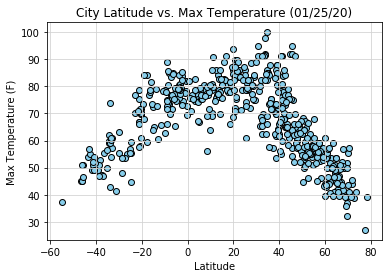

In [51]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (01/25/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("figure_1.png")
plt.show()

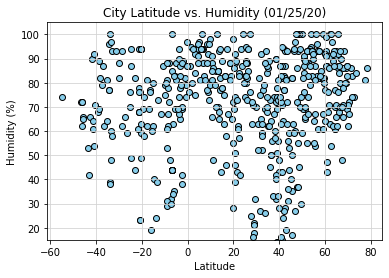

In [52]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (01/25/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("figure_2.png")
plt.show()

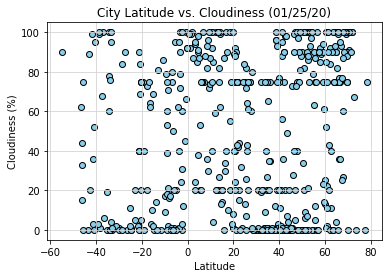

In [53]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (01/25/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("figure_3.png")
plt.show()

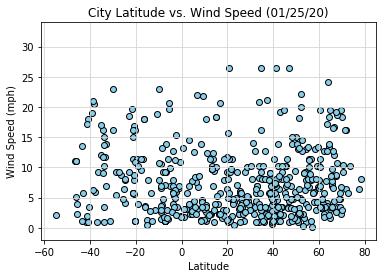

In [54]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (01/25/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("figure_4.png")
plt.show()

In [55]:
nothern = weather_df.loc[weather_df["Lat"] >= 0.0]
nothern.reset_index(inplace=True)

southern = weather_df.loc[weather_df["Lat"] < 0.0]
southern.reset_index(inplace=True)

In [56]:
# Define plotting function

def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.savefig("figure_5.png")
    plt.show()

The r-squared is: -0.7632376200088289


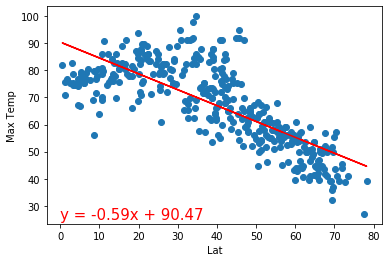

<Figure size 432x288 with 0 Axes>

In [57]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

xlbl = "Lat"
ylbl = "Max Temp"
lblpos = (0,25)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,5)
plt.savefig("figure_6.png")
plt.show()

In [58]:
# This graph shows a negative relationship between maximum temperature and latitude.  The r-squared value is close to -1.  Therefore, this regression accounts for most outliers.  This makes sense because the temperature lowers as one travels further from the equator. For example, the temperature in Anchorage, Alaska is far lower than Miami, Florida because Anchorage is further from the equator.

The r-squared is: 0.8504522459892223


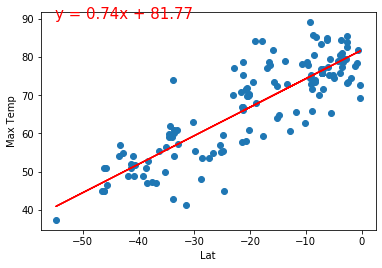

<Figure size 432x288 with 0 Axes>

In [59]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

xlbl = "Lat"
ylbl = "Max Temp"
lblpos = (-55,90)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,6)
plt.savefig("figure_7.png")

In [60]:
#This graph is similar to the Northern Hemisphere.  Although, the r-squared value is not as close to 1 or -1.  Therefore, the causal relationship is not as reliable. 

The r-squared is: -0.010157741979554722


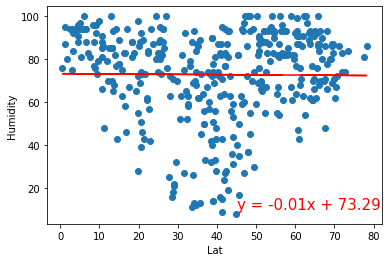

<Figure size 432x288 with 0 Axes>

In [61]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (45,10)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,7)
plt.savefig("figure_8.png")

In [62]:
#This graph shows the relationship between humidity and latitude in the Northern Hemishpere is not strong. 

The r-squared is: -0.07221396160152463


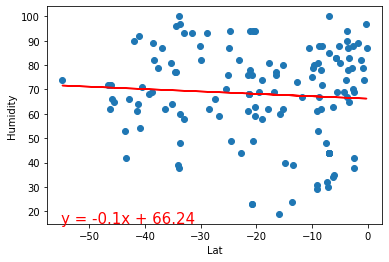

<Figure size 432x288 with 0 Axes>

In [63]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (-55,15)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,8)
plt.savefig("figure_9.png")

In [64]:
#Similar to the Northern Hemisphere, the relationship between humidity and latitude in the Southern Hemisphere is not strong. 

The r-squared is: 0.04552106401801555


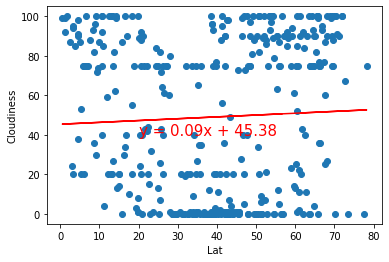

<Figure size 432x288 with 0 Axes>

In [65]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (20,40)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,9)
plt.savefig("figure_10.png")

In [66]:
# There is a weak relationship between cloudiness and latitude in the Northern Hemisphere. 

The r-squared is: -0.039568295872582544


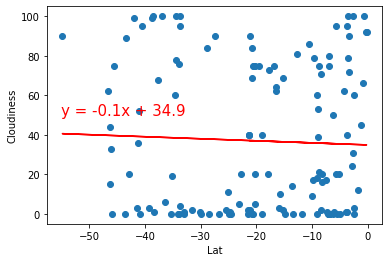

<Figure size 432x288 with 0 Axes>

In [67]:
# Sourhern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (-55,50)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,10)
plt.savefig("figure_11.png")

In [68]:
# Similarly, there is a weak relationship between cloudiness and latitude in the Southern Hemisphere. 

The r-squared is: 0.13585645318352937


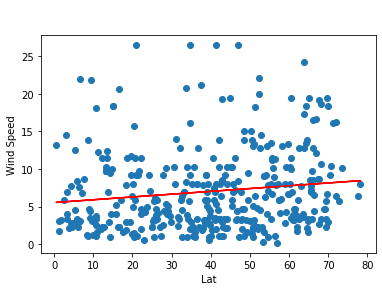

<Figure size 432x288 with 0 Axes>

In [69]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (0,30)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,11)
plt.savefig("figure_12.png")

In [70]:
# There is almost no relationship between wind speed and latitude in the North Hemisphere. 

The r-squared is: -0.1729438177311622


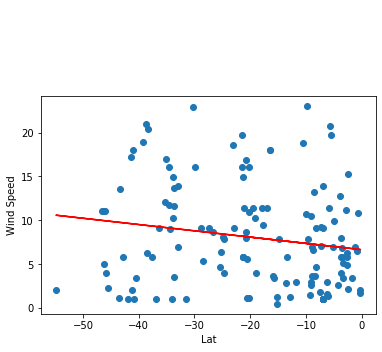

<Figure size 432x288 with 0 Axes>

In [71]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (-25,33)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,12)
plt.savefig("figure_13.png")

In [72]:
# The relationship between wind speed and latitude is slightly stronger in the Southern Hemisphere.  But the relationship is not strong enough to be a reliable predictor.